In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5

In [5]:
f(3.0)

20.0

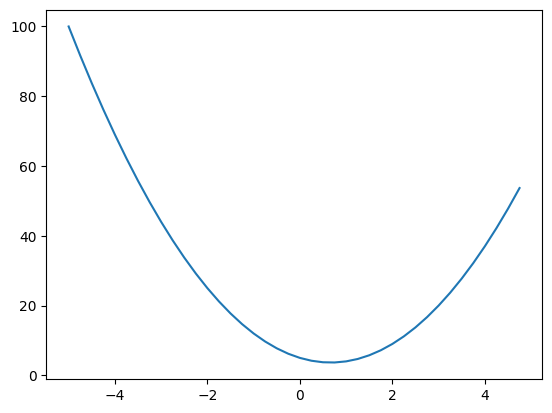

In [7]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [15]:
h = 0.0001 
x = -3.0
(f(x+h) -f(x))/h

-21.999700000066014

In [17]:
h = 0.00000001 
x = 2/3
(f(x+h) -f(x))/h

0.0

In [18]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [24]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print('d1',d1)
print('d2',d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [23]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c
print('d1',d1)
print('d2',d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [ ]:
#Forward Pass

In [35]:
class Value:
    def __init__(self, data):
        self.data = data 
    def __repr__(self):
     return f"Value(data = {self.data}"
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
        
a = Value(2.0)
b = Value(-3.0)
a + b
a.__add__(b)

Value(data = -1.0

In [40]:
class Value:
    def __init__(self, data):
        self.data = data 
    def __repr__(self):
     return f"Value(data = {self.data}"
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a * b + c
(a.__mul__(b)).__add__(c)

Value(data = 4.0

In [48]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data 
        self._prev = set(_children)
        
    def __repr__(self):
     return f"Value(data = {self.data}"
        
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other))
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

Value(data = 4.0

In [49]:
d._prev

{Value(data = -6.0, Value(data = 10.0}

In [63]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        
    def __repr__(self):
     return f"Value(data = {self.data}"
        
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        return out
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a * b + c
d

Value(data = 4.0

In [64]:
d._op

'+'

In [76]:
from graphviz import Digraph 

def trace(root): 
    #builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set() 
    
    def build(v): 
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v)) 
                build(child) 
    
    build(root) 
    return nodes, edges 

def draw_dot(root): 
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR left to right 
    nodes, edges = trace(root) 
    for n in nodes: 
        uid = str(id(n)) 
        # for any value in the graph, create a rectangular (record) node for it 
        dot.node(name=uid, label="| data %.4f" % (n.data), shape="record") 
        if n._op: 
            # if this value is a result of some operation, create an op node for it 
            dot.node(name=uid + n._op, label=n._op) 
            # and connect this node to it 
            dot.edge(uid + n._op, uid) 
    
    for n1, n2 in edges: 
        # connect n1 to the op node of n2 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op) 
    
    return dot


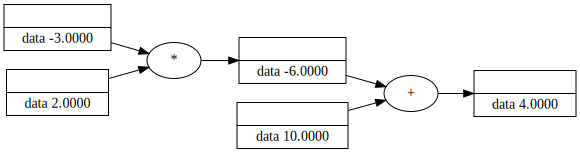

In [77]:
draw_dot(d)

In [58]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 1.0 MB/s eta 0:00:0031m983.7 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [79]:
class Value:
    def __init__(self, data, _children=(), _op='', label =''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
     return f"Value(data = {self.data}"
        
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        return out
        
a = Value(2.0, label ='a')
b = Value(-3.0, label ='b')
c = Value(10.0,label ='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
d

Value(data = 4.0

In [82]:
from graphviz import Digraph 

def trace(root): 
    #builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set() 
    
    def build(v): 
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v)) 
                build(child) 
    
    build(root) 
    return nodes, edges 

def draw_dot(root): 
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR left to right 
    
    nodes, edges = trace(root) 
    for n in nodes: 
        uid = str(id(n)) 
        # for any value in the graph, create a rectangular (record) node for it 
        dot.node(name=uid, label="{%s | data %.4f}" % (n.label, n.data), shape="record") 
        if n._op: 
            # if this value is a result of some operation, create an op node for it 
            dot.node(name=uid + n._op, label=n._op) 
            # and connect this node to it 
            dot.edge(uid + n._op, uid) 
    
    for n1, n2 in edges: 
        # connect n1 to the op node of n2 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op) 
    
    return dot


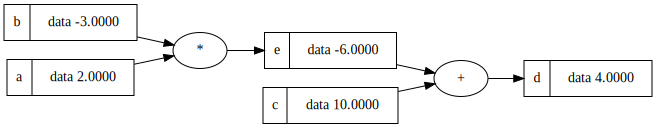

In [83]:
draw_dot(d)

In [86]:
class Value:
    def __init__(self, data, _children=(), _op='', label =''):
        self.data = data 
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
     return f"Value(data = {self.data}"
        
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        return out
        
a = Value(2.0, label ='a')
b = Value(-3.0, label ='b')
c = Value(10.0,label ='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0

In [87]:
from graphviz import Digraph 

def trace(root): 
    #builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set() 
    
    def build(v): 
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v)) 
                build(child) 
    
    build(root) 
    return nodes, edges 

def draw_dot(root): 
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR left to right 
    
    nodes, edges = trace(root) 
    for n in nodes: 
        uid = str(id(n)) 
        # for any value in the graph, create a rectangular (record) node for it 
        dot.node(name=uid, label="{%s | data %.4f}" % (n.label, n.data), shape="record") 
        if n._op: 
            # if this value is a result of some operation, create an op node for it 
            dot.node(name=uid + n._op, label=n._op) 
            # and connect this node to it 
            dot.edge(uid + n._op, uid) 
    
    for n1, n2 in edges: 
        # connect n1 to the op node of n2 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op) 
    
    return dot


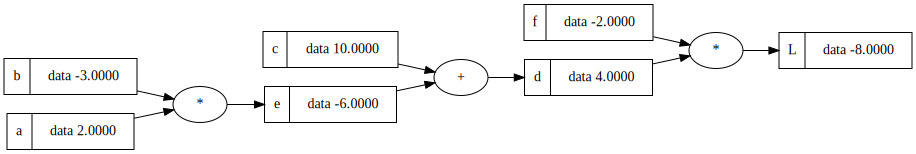

In [88]:
draw_dot(L)

In [ ]:
#Back Pass

In [89]:
class Value:
    def __init__(self, data, _children=(), _op='', label =''):
        self.data = data 
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
     return f"Value(data = {self.data}"
        
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other),'*')
        return out
        
a = Value(2.0, label ='a')
b = Value(-3.0, label ='b')
c = Value(10.0,label ='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Value(data = -8.0

In [90]:
from graphviz import Digraph 

def trace(root): 
    #builds a set of all nodes and edges in a graph 
    nodes, edges = set(), set() 
    
    def build(v): 
        if v not in nodes: 
            nodes.add(v) 
            for child in v._prev: 
                edges.add((child, v)) 
                build(child) 
    
    build(root) 
    return nodes, edges 

def draw_dot(root): 
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR left to right 
    
    nodes, edges = trace(root) 
    for n in nodes: 
        uid = str(id(n)) 
        # for any value in the graph, create a rectangular (record) node for it 
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record") 
        if n._op: 
            # if this value is a result of some operation, create an op node for it 
            dot.node(name=uid + n._op, label=n._op) 
            # and connect this node to it 
            dot.edge(uid + n._op, uid) 
    
    for n1, n2 in edges: 
        # connect n1 to the op node of n2 
        dot.edge(str(id(n1)), str(id(n2)) + n2._op) 
    
    return dot


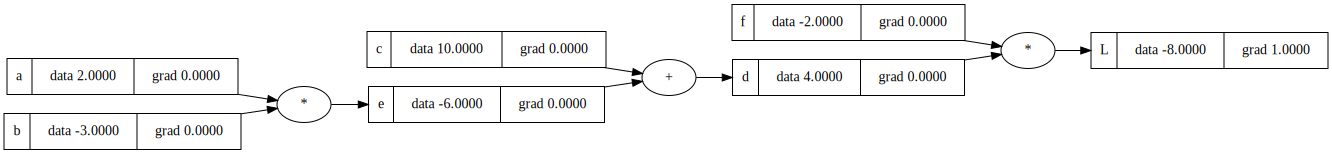

In [101]:
draw_dot(L)

In [ ]:
L = d * f
dL/dd =? f
(f(x*h)-f(x)/h

In [102]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2

In [104]:
def lol():
    
    h = 0.001 
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label ='b')
    c = Value(10.0,label ='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label ='b')
    c = Value(10.0,label ='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0+h, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

lol()

3.9999999999995595


In [106]:
def lol():
    
    h = 0.001 
    
    a = Value(2.0, label ='a')
    b = Value(-3.0, label ='b')
    c = Value(10.0,label ='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label ='a')
    b = Value(-3.0, label ='b')
    c = Value(10.0,label ='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f = Value(-2.0, label = 'f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2-L1)/h)

lol()

-2.000000000000668
